In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import requests
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from itertools import combinations
from collections import OrderedDict 

%matplotlib inline

/Users/scottlew/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## READ IN MLB STATS FOR 1876-2018 SEASONS 

## Note: No salary data is used for regression in this case.

In [2]:
# read data from csv file for 2001-2018 MLB seasons
#df = pd.read_csv('MLB_STATS_1900-2018_BP.csv')
df = pd.read_csv('MLB_STATS_1876-2018_BP.csv')

In [3]:
df.head()

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,SO_y,SO/W,SO9,SV,W,W-L%,WHIP,WP,cSho,tSho
0,ATH,21,26.0,6.30,60,2414,2387,378,646,79,...,22,0.54,0.4,2,14,0.237,1.498,33,1.0,1.0
1,BSN,17,24.7,6.73,70,2780,2722,471,723,96,...,77,0.74,1.1,7,39,0.557,1.323,46,3.0,3.0
2,CHC,11,25.9,9.45,66,2818,2748,624,926,131,...,51,1.76,0.8,4,52,0.788,1.075,3,8.0,9.0
3,CIN,13,24.5,3.66,65,2413,2372,238,555,51,...,60,1.76,0.9,0,9,0.138,1.496,28,0.0,0.0
4,HAR,12,26.3,6.22,69,2703,2664,429,711,96,...,114,4.22,1.6,0,47,0.691,0.957,15,11.0,11.0


In [4]:
df.shape

(2815, 65)

In [5]:
df.tail()

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,SO_y,SO/W,SO9,SV,W,W-L%,WHIP,WP,cSho,tSho
2810,STL,49,28.0,4.69,162,6200,5498,759,1369,248,...,1337,2.25,8.3,43,88,0.543,1.338,63,1.0,8.0
2811,TBR,54,27.1,4.42,162,6195,5475,716,1415,274,...,1421,2.84,8.8,52,90,0.556,1.199,55,0.0,14.0
2812,TEX,50,27.4,4.55,162,6163,5453,737,1308,266,...,1121,2.28,7.1,42,67,0.414,1.403,57,0.0,5.0
2813,TOR,63,28.9,4.38,162,6076,5477,709,1336,320,...,1298,2.36,8.1,39,73,0.451,1.414,71,0.0,3.0
2814,WSN,53,27.6,4.76,162,6288,5517,771,1402,284,...,1417,2.91,8.8,40,82,0.506,1.250,42,1.0,7.0


In [6]:
df.dtypes

Tm         object
#Bat        int64
BatAge    float64
R/G       float64
G_x         int64
PA          int64
AB          int64
R_x         int64
H_x         int64
2B          int64
3B          int64
HR_x        int64
RBI       float64
SB        float64
CS        float64
BB_x        int64
SO_x        int64
BA        float64
OBP       float64
SLG       float64
OPS       float64
OPS+        int64
TB          int64
GDP       float64
HBP_x     float64
SH        float64
SF        float64
IBB_x     float64
LOB_x     float64
Year        int64
           ...   
CG          int64
ER          int64
ERA       float64
ERA+        int64
FIP       float64
G_y         int64
GF          int64
GS          int64
H_y         int64
H9        float64
HBP_y     float64
HR_y        int64
HR9       float64
IBB_y     float64
IP        float64
L           int64
LOB_y     float64
PAge      float64
R_y         int64
RA/G      float64
SO_y        int64
SO/W      float64
SO9       float64
SV          int64
W         

In [7]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'BB_y', 'BB9', 'BF', 'BK', 'CG', 'ER', 'ERA', 'ERA+',
       'FIP', 'G_y', 'GF', 'GS', 'H_y', 'H9', 'HBP_y', 'HR_y', 'HR9', 'IBB_y',
       'IP', 'L', 'LOB_y', 'PAge', 'R_y', 'RA/G', 'SO_y', 'SO/W', 'SO9', 'SV',
       'W', 'W-L%', 'WHIP', 'WP', 'cSho', 'tSho'],
      dtype='object')

In [8]:
df.Year.value_counts()

1884    33
2017    30
2015    30
1998    30
2002    30
2004    30
2006    30
2008    30
2010    30
2012    30
2014    30
2016    30
2018    30
2005    30
2013    30
1999    30
2001    30
2003    30
2007    30
2009    30
2011    30
1993    28
1997    28
1996    28
1994    28
1995    28
1992    26
1990    26
1988    26
1986    26
        ..
1941    16
1905    16
1911    16
1901    16
1883    16
1957    16
1955    16
1953    16
1951    16
1947    16
1949    16
1885    16
1887    16
1889    16
1882    14
1892    12
1897    12
1895    12
1893    12
1894    12
1896    12
1898    12
1899    12
1881     8
1900     8
1879     8
1880     8
1876     8
1877     6
1878     6
Name: Year, Length: 142, dtype: int64

In [9]:
correlation = df.corr()

## Study Correlation Of Features With Wins.

In [10]:
W_corr = correlation.W
W_corr

#Bat      0.178940
BatAge    0.352487
R/G       0.224332
G_x       0.582830
PA        0.629993
AB        0.599076
R_x       0.626056
H_x       0.649828
2B        0.509120
3B        0.014362
HR_x      0.447111
RBI       0.648062
SB       -0.008447
CS       -0.016638
BB_x      0.586737
SO_x      0.304754
BA        0.353061
OBP       0.533598
SLG       0.521056
OPS       0.564913
OPS+      0.549647
TB        0.649951
GDP       0.077197
HBP_x     0.127109
SH       -0.018893
SF        0.354130
IBB_x     0.354443
LOB_x     0.359822
Year      0.352521
#P        0.186490
            ...   
CG       -0.175771
ER        0.081558
ERA      -0.242158
ERA+      0.563912
FIP      -0.025223
G_y       0.582832
GF        0.356504
GS        0.582657
H_y       0.240439
H9       -0.487337
HBP_y    -0.092135
HR_y      0.256221
HR9       0.207969
IBB_y    -0.050684
IP        0.612138
L        -0.332367
LOB_y     0.042761
PAge      0.390851
R_y      -0.162247
RA/G     -0.607445
SO_y      0.441019
SO/W      0.

## Examine the data for Null values.

In [11]:
#df.SV.isna().sum()
df.isnull().sum()

Tm           0
#Bat         0
BatAge       0
R/G          0
G_x          0
PA           0
AB           0
R_x          0
H_x          0
2B           0
3B           0
HR_x         0
RBI         15
SB         123
CS         717
BB_x         0
SO_x         0
BA           0
OBP          0
SLG          0
OPS          0
OPS+         0
TB           0
GDP        909
HBP_x      110
SH         253
SF        1197
IBB_x      989
LOB_x      445
Year         0
          ... 
CG           0
ER           0
ERA          0
ERA+         0
FIP          0
G_y          0
GF           0
GS           0
H_y          0
H9           0
HBP_y      110
HR_y         0
HR9          0
IBB_y      989
IP           0
L            0
LOB_y      445
PAge         0
R_y          0
RA/G         0
SO_y         0
SO/W         0
SO9          0
SV           0
W            0
W-L%         0
WHIP         0
WP           0
cSho         8
tSho         8
Length: 65, dtype: int64

In [12]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'BB_y', 'BB9', 'BF', 'BK', 'CG', 'ER', 'ERA', 'ERA+',
       'FIP', 'G_y', 'GF', 'GS', 'H_y', 'H9', 'HBP_y', 'HR_y', 'HR9', 'IBB_y',
       'IP', 'L', 'LOB_y', 'PAge', 'R_y', 'RA/G', 'SO_y', 'SO/W', 'SO9', 'SV',
       'W', 'W-L%', 'WHIP', 'WP', 'cSho', 'tSho'],
      dtype='object')

## Exploratory Data Analysis

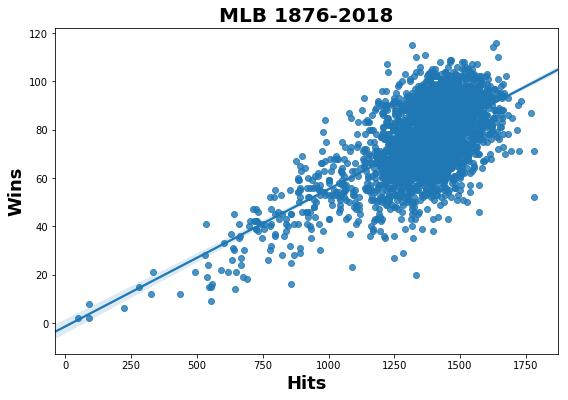

In [13]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="H_x", y="W", data = df)
plt.xlabel('Hits', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)
#plt.savefig('MLB_W&OPS_5seasons.png')

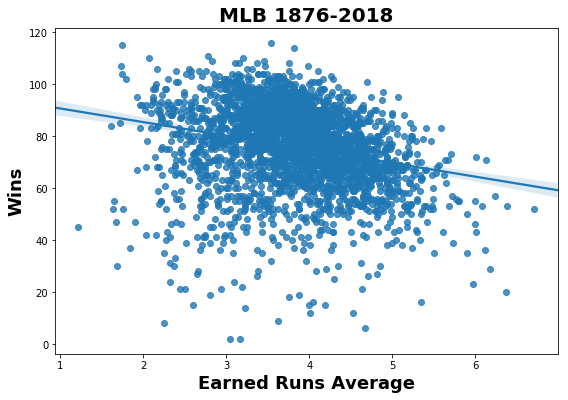

In [14]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="ERA", y="W", data = df)
plt.xlabel('Earned Runs Average', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)

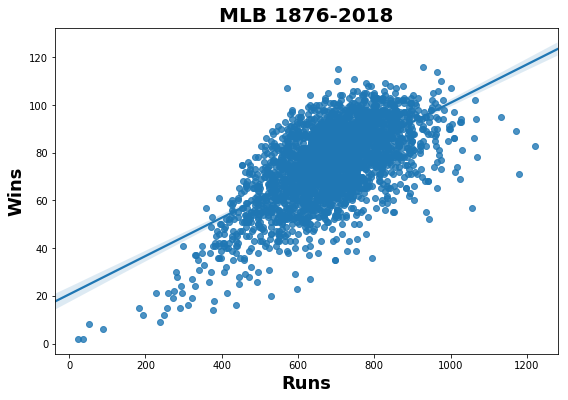

In [15]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="R_x", y="W", data = df)
plt.xlabel('Runs', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)

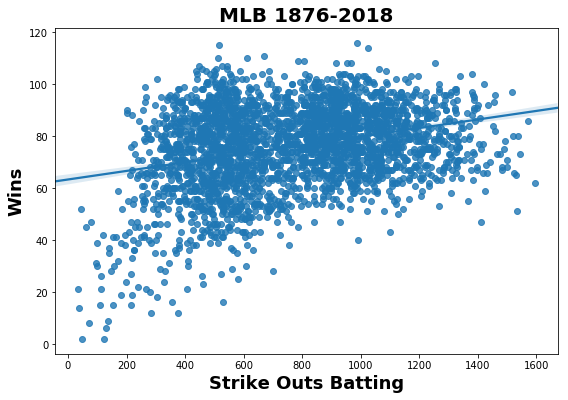

In [16]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="SO_x", y="W", data = df)
plt.xlabel('Strike Outs Batting', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)

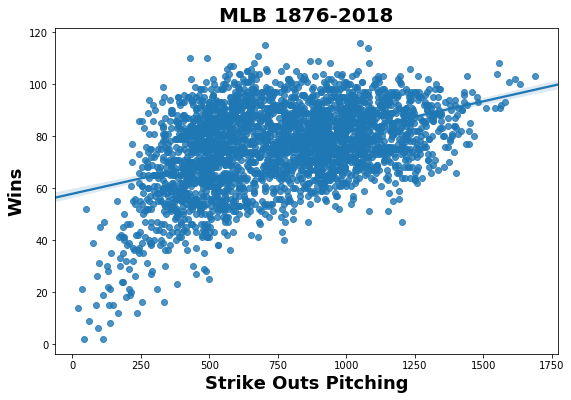

In [17]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="SO_y", y="W", data = df)
plt.xlabel('Strike Outs Pitching', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)

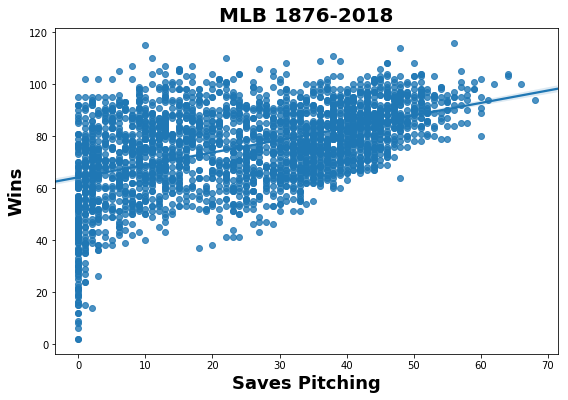

In [18]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="SV", y="W", data = df)
plt.xlabel('Saves Pitching', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)

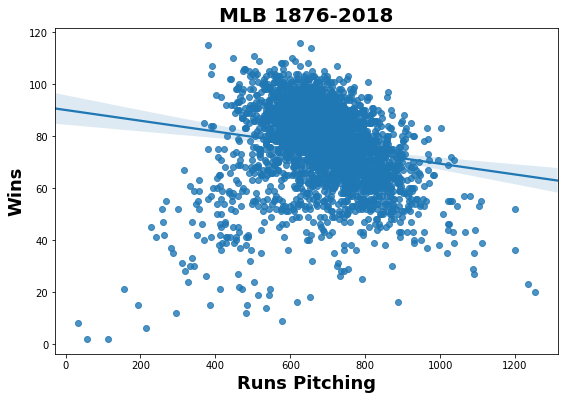

In [19]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="R_y", y="W", data = df)
plt.xlabel('Runs Pitching', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)

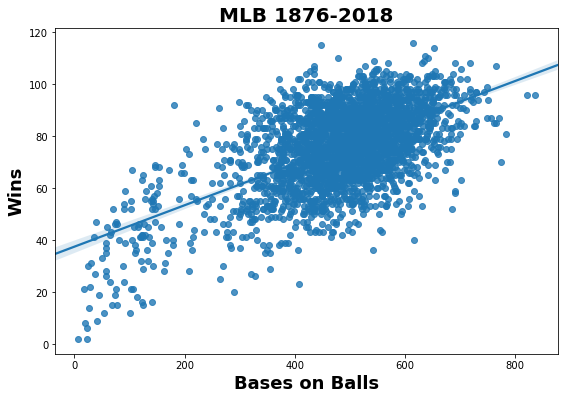

In [20]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="BB_x", y="W", data = df)
plt.xlabel('Bases on Balls', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)

## No surprise. Wins are positively correlated with runs, and hits. But, wins are negatively correlated with Earned Run Average (ERA).

In [21]:
predictors = ['W','#Bat','BatAge','G_x','PA','AB', 'R_x','H_x','2B','HR_x']
 
df_1 = df[predictors]

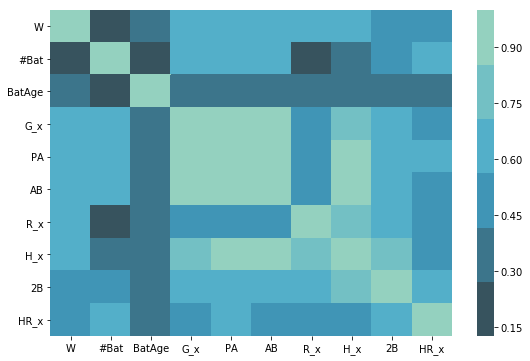

In [22]:
%matplotlib inline 
corr = df_1.corr()
plt.figure(figsize = [9,6]) 
#sns.palplot(sns.diverging_palette(220, 20, n=7))
#sns.heatmap(corr, cmap= sns.diverging_palette(220, 20, n=10),
            #xticklabels=corr.columns.values,
            #yticklabels=corr.columns.values)
sns.heatmap(corr,cmap = sns.color_palette("GnBu_d"),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#sns.heatmap(corr, cmap= sns.diverging_palette(20, 220, n=8),
            #xticklabels=corr.columns.values,
            #yticklabels=corr.columns.values)